## Handling Categorical data

### A 1. pandas.get_dummies(). 
### B 1. pandas.factorize() or sklearn.preprocessing.LabelEncoder() --  both gives numerical values.
### B 2. use sklearn.preprocessing.OneHotEncoder() to get columns.

• Label Binarizer: This will replace the binary variable text with
numeric vales. We’ll be using this function for the binary
categorical variables.
• Label Encoder: This will replace category level with number
representation.
• One Hot Encoder: This will convert n levels to n-1 new variable,
and the new variables will use 1 to indicate the presence of level
and 0 for otherwise. Note that before calling OneHotEncoder,
we should use LabelEncoder to convert levels to number.
Alternatively we can achieve the same using get_dummies of the
Pandas package. This is much more efficient to use as we can
directly use it on the column with text description without having
to convert to numbers first.

In [1]:
import pandas as pd

In [2]:
df= pd.DataFrame({  'A': ['high', 'medium', 'low'],
                    'B': [10,20,30]} ,
                     index = [0,1,2]  )
df

,A,B
0,high,10
1,medium,20
2,low,30


In [3]:
df_with_dummies = pd.get_dummies(df, prefix="A", columns =["A"])

df_with_dummies

,B,A_high,A_low,A_medium
0,10,1,0,0
1,20,0,0,1
2,30,0,1,0


In [4]:
# using pandas package's factorize function
df['A_pd_factorized'] = pd.factorize(df['A'])[0]
df

,A,B,A_pd_factorized
0,high,10,0
1,medium,20,1
2,low,30,2


In [5]:
# Alternatively you can use sklearn package's LabelEncoder function
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['A_LabelEncoded'] = le.fit_transform(df["A"])
df
# One hot encoder only takes numerical categorical values, hence any value of string type should be label encoded before one-hot encoded.

,A,B,A_pd_factorized,A_LabelEncoded
0,high,10,0,0
1,medium,20,1,2
2,low,30,2,1


## Label encoder in sklear and its laternative in pandas as category codes.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# converting type of columns to 'category'
bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
bridge_types = ('Arch','Beam','Truss','Cantilever','Tied Arch','Suspension','Cable')
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,Arch,0
1,Beam,1
2,Truss,6
3,Cantilever,3
4,Tied Arch,5
5,Suspension,4
6,Cable,2


## Normalizing Data

Bringing all the different types of variable units in the same order of magnitude thus eliminates the potential outlier measurements that would misrepresent the finding and negatively affect the accuracy of the conclusion. Two broadly used methods for rescaling data are normalization and standardization.

_**Normalizing**_ data can be achieved by Min-Max scaling; the formula is given below, which will scale all numeric values in the range 0 to 1.

_**The standardization**_ technique will transform the variables to have a zero meanand standard deviation of one. The formula for standardization is given below and the outcome is commonly known as z-scores.

In [8]:
from sklearn import datasets
import numpy as np
from sklearn import preprocessing
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)
minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)
print('Mean before standardization: petal length={:.1f}, petal width={:.1f}'.format(X[:,0].mean(), X[:,1].mean()))
print('SD before standardization: petal length={:.1f}, petal width={:.1f}'.format(X[:,0].std(), X[:,1].std()))
print('Mean after standardization: petal length={:.1f}, petal width={:.1f}'.format(X_std[:,0].mean(), X_std[:,1].mean()))
print('SD after standardization: petal length={:.1f}, petal width={:.1f}'.format(X_std[:,0].std(), X_std[:,1].std()))
print('\nMin value before min-max scaling: patel length={:.1f}, patelwidth={:.1f}'.format(X[:,0].min(), X[:,1].min()))
print('Max value before min-max scaling: petal length={:.1f}, petalwidth={:.1f}'.format(X[:,0].max(), X[:,1].max()))
print('Min value after min-max scaling: patel length={:.1f}, patelwidth={:.1f}'.format(X_minmax[:,0].min(), X_minmax[:,1].min()))
print('Max value after min-max scaling: petal length={:.1f}, petalwidth={:.1f}'.format(X_minmax[:,0].max(), X_minmax[:,1].max()))

Mean before standardization: petal length=3.8, petal width=1.2
SD before standardization: petal length=1.8, petal width=0.8
Mean after standardization: petal length=-0.0, petal width=-0.0
SD after standardization: petal length=1.0, petal width=1.0

Min value before min-max scaling: patel length=1.0, patelwidth=0.1
Max value before min-max scaling: petal length=6.9, petalwidth=2.5
Min value after min-max scaling: patel length=0.0, patelwidth=0.0
Max value after min-max scaling: petal length=1.0, petalwidth=1.0


In [9]:
dir(iris)
print(iris["target"])
# print(iris["data"])
# type(iris["data"])
# iris["data"][:,[2,3]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Feature Construction or Generation

It means thinking about aggregating, splitting, or combining features to create new features, or decomposing features.

## Exploratory Data Analysis (EDA)

EDA is all about understanding your data by employing summarizing and visualizing techniques. At a high level the EDA can be performed in two folds, that is, univariate analysis and multivariate analysis.

In [10]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris = datasets.load_iris()
# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
columns= iris['feature_names'] + ['species'])
# replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.
species==1.0,'versicolor', 'virginica'))
# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')
iris.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

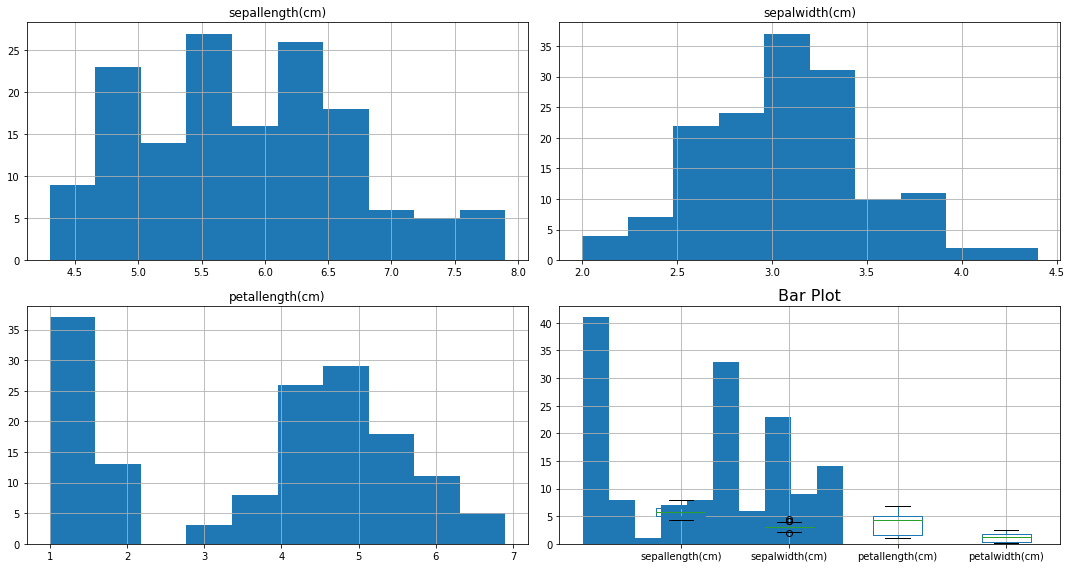

In [16]:
# Set the size of the plot
iris.hist(figsize = (15,8)) # plot histogram
# use suptitle to add title to all sublots
# plt.show()
iris.boxplot() # plot boxplot
plt.title("Bar Plot", fontsize=16)
plt.tight_layout()

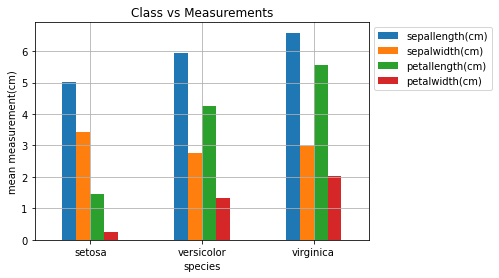

In [17]:
# print the mean for each column by species
iris.groupby(by = "species").mean()
# plot for mean of each feature for each label class
iris.groupby(by = "species").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0) # manage the xticks rotation
plt.grid(True)
# Use bbox_to_anchor option to place the legend outside plot area to be tidy
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

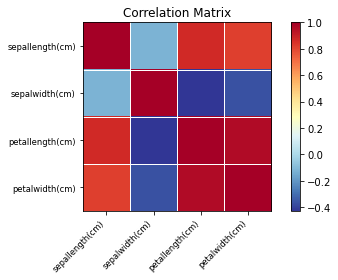

In [18]:
# create correlation matrix
corr = iris.corr()
corr
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [19]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(iris, figsize=(10, 10))
# use suptitle to add title to all sublots
plt.subtitle("Pair Plot", fontsize=20)

ModuleNotFoundError: No module named 'pandas.tools'